In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import classification_report as report
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix as conf

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv("./customers.csv")

In [15]:
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Segmentation'],
      dtype='object')

In [13]:
df.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Segmentation        object
dtype: object

In [14]:
df.shape
df.isnull().sum()

Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Segmentation          0
dtype: int64

In [4]:
df = df.drop('ID',axis=1)
df = df.drop('Var_1',axis=1)

In [5]:
df_cleaned = df.dropna(axis=0)

In [6]:
df_cleaned.isnull().sum()
df_cleaned.shape
df_cleaned.dtypes

Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Segmentation        object
dtype: object

In [7]:
df_cleaned['Gender'].unique()
df_cleaned['Ever_Married'].unique()
df_cleaned['Graduated'].unique()
df_cleaned['Profession'].unique()
df_cleaned['Spending_Score'].unique()
df_cleaned['Segmentation'].unique()

array(['D', 'B', 'C', 'A'], dtype=object)

In [8]:
categories_list=[['Male', 'Female'],['No', 'Yes'],
                 ['No', 'Yes'],['Healthcare', 'Engineer',
                 'Lawyer','Artist', 'Doctor','Homemaker',
                 'Entertainment', 'Marketing', 'Executive'],
                 ['Low', 'Average', 'High']]

In [9]:
enc = OrdinalEncoder(categories=categories_list)
df1 = df_cleaned.copy()

In [10]:
df1[['Gender','Ever_Married',
     'Graduated','Profession',
     'Spending_Score']] = enc.fit_transform(df1[['Gender',
     						'Ever_Married','Graduated',
                            'Profession','Spending_Score']])

In [11]:
df1
df1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation        object
dtype: object

In [12]:
le = LabelEncoder()
df1['Segmentation'] = le.fit_transform(df1['Segmentation'])
df1.dtypes

Gender             float64
Ever_Married       float64
Age                  int64
Graduated          float64
Profession         float64
Work_Experience    float64
Spending_Score     float64
Family_Size        float64
Segmentation         int64
dtype: object

In [17]:
corr = df1.corr()

<Axes: >

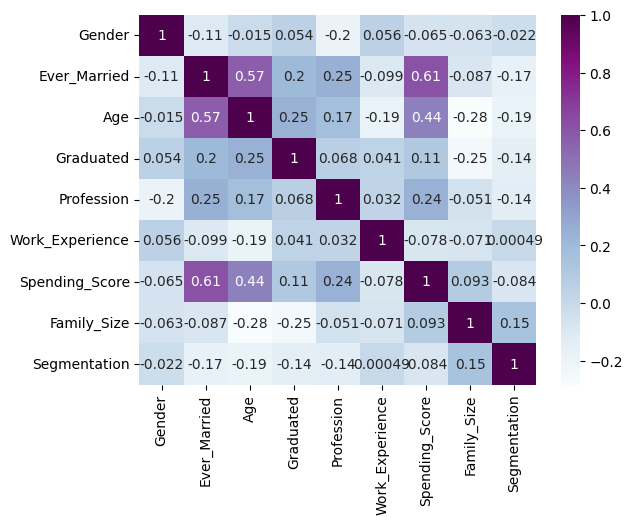

In [18]:
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap="BuPu",
            annot= True)

<ipython-input-19-29dcdd096848>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Age'])


<Axes: xlabel='Age', ylabel='Density'>

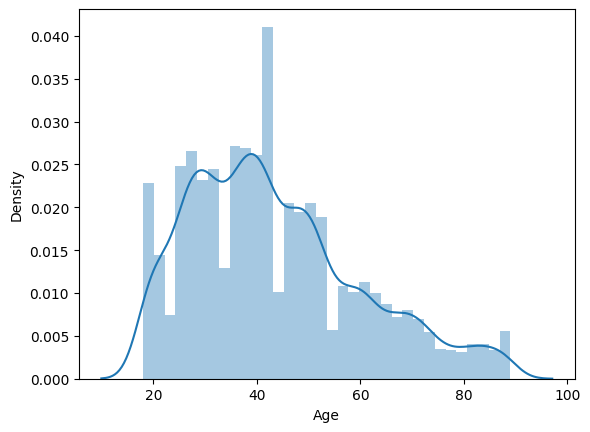

In [19]:
sns.distplot(df1['Age'])

<Axes: xlabel='Family_Size', ylabel='Age'>

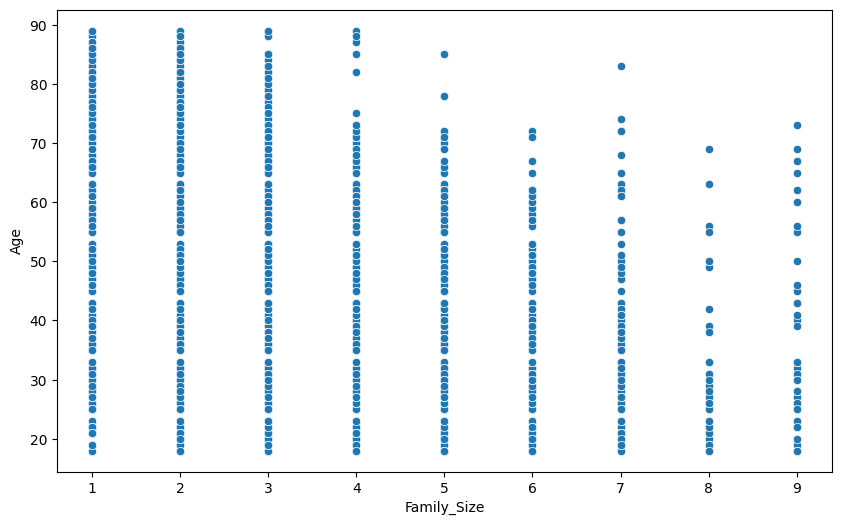

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Family_Size',y='Age',data=df1)

In [22]:
scale = MinMaxScaler()
scale.fit(df1[["Age"]]) # Fetching Age column alone
df1[["Age"]] = scale.transform(df1[["Age"]])

In [23]:
df1.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
count,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000,8896.000000
mean,0.449753,0.591389,0.359171,0.633543,3.284735,2.612747,0.545414,2.841165,1.518660
std,0.497497,0.491605,0.233407,0.481863,2.346963,3.391636,0.738536,1.533532,1.146635
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.183099,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.000000,0.323944,1.000000,3.000000,1.000000,0.000000,2.000000,2.000000
75%,1.000000,1.000000,0.492958,1.000000,5.000000,4.000000,1.000000,4.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,8.000000,14.000000,2.000000,9.000000,3.000000


In [24]:
df1['Segmentation'].unique()

array([3, 1, 2, 0])

In [25]:
x = df1[['Gender','Ever_Married','Age','Graduated',
		 'Profession','Work_Experience','Spending_Score',
         'Family_Size']].values

In [26]:
y1 = df1[['Segmentation']].values

In [27]:
ohe = OneHotEncoder()
ohe.fit(y1)

OneHotEncoder()

In [28]:
y = ohe.transform(y1).toarray()

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=50)

In [30]:
ai = Sequential([Dense(50,input_shape = [8]),
                 Dense(40,activation="relu"),
                 Dense(30,activation="relu"),
                 Dense(20,activation="relu"),
                 Dense(4,activation="softmax")])

In [31]:
ai.compile(optimizer='adam',
           loss='categorical_crossentropy',
           metrics=['accuracy'])

In [32]:
early_stop = EarlyStopping(
    monitor='val_loss',
    mode='max',
    verbose=1,
    patience=20)

In [33]:
ai.fit( x = x_train, y = y_train,
        epochs=500, batch_size=256,
        validation_data=(x_test,y_test),
        callbacks = [early_stop]
        )

Epoch 1/500
24/24 [==============================] - 3s 41ms/step - loss: 1.3913 - accuracy: 0.2948 - val_loss: 1.3554 - val_accuracy: 0.3570
Epoch 2/500
24/24 [==============================] - 0s 16ms/step - loss: 1.3441 - accuracy: 0.3570 - val_loss: 1.3282 - val_accuracy: 0.3867
Epoch 3/500
24/24 [==============================] - 0s 15ms/step - loss: 1.3116 - accuracy: 0.3958 - val_loss: 1.2910 - val_accuracy: 0.3918
Epoch 4/500
24/24 [==============================] - 0s 7ms/step - loss: 1.2745 - accuracy: 0.4116 - val_loss: 1.2531 - val_accuracy: 0.4359
Epoch 5/500
24/24 [==============================] - 0s 8ms/step - loss: 1.2534 - accuracy: 0.4228 - val_loss: 1.2383 - val_accuracy: 0.4508
Epoch 6/500
24/24 [==============================] - 0s 7ms/step - loss: 1.2450 - accuracy: 0.4288 - val_loss: 1.2367 - val_accuracy: 0.4488
Epoch 7/500
24/24 [==============================] - 0s 5ms/step - loss: 1.2437 - accuracy: 0.4331 - val_loss: 1.2302 - val_accuracy: 0.4501
Epoch 8/50

In [34]:
metrics = pd.DataFrame(ai.history.history)
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.391280,0.294772,1.355449,0.357047
1,1.344121,0.356998,1.328247,0.386716
2,1.311627,0.395784,1.291037,0.391773
3,1.274516,0.411636,1.253110,0.435941
4,1.253350,0.422766,1.238273,0.450775


<Axes: >

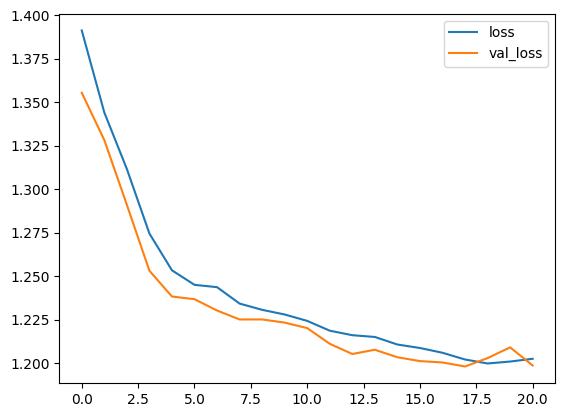

In [35]:
metrics[['loss','val_loss']].plot()

<Axes: >

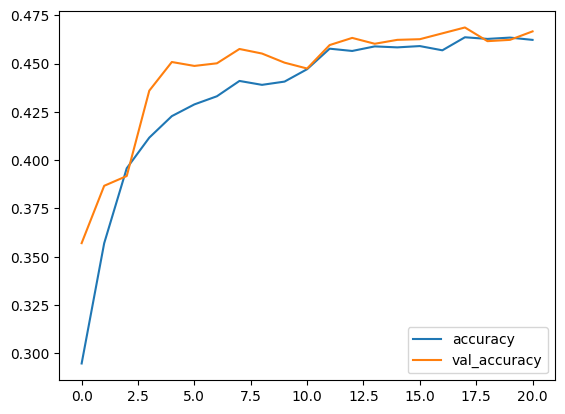

In [36]:
metrics[['accuracy','val_accuracy']].plot()

In [37]:
x_pred = np.argmax(ai.predict(x_test), axis=1)
x_pred.shape

93/93 [==============================] - 1s 3ms/step


(2966,)

In [38]:
y_truevalue = np.argmax(y_test,axis=1)
y_truevalue.shape

(2966,)

In [39]:
conf(y_truevalue,x_pred)

array([[343, 160, 145, 131],
       [192, 158, 247,  72],
       [113, 112, 428,  78],
       [199,  67,  66, 455]])

In [40]:
print(report(y_truevalue,x_pred))

              precision    recall  f1-score   support

           0       0.40      0.44      0.42       779
           1       0.32      0.24      0.27       669
           2       0.48      0.59      0.53       731
           3       0.62      0.58      0.60       787

    accuracy                           0.47      2966
   macro avg       0.46      0.46      0.45      2966
weighted avg       0.46      0.47      0.46      2966



In [41]:
import pickle

In [42]:
# Saving the Model
ai.save('customer_classification_model.h5')


In [43]:
# Saving the data
with open('customer_data.pickle', 'wb') as fh:
   pickle.dump([x_train,y_train,x_test,y_test,df1,df_cleaned,scale,enc,ohe,le], fh)

In [44]:
# Loading the Model
ai_brain = load_model('customer_classification_model.h5')

In [45]:
# Loading the data
with open('customer_data.pickle', 'rb') as fh:
   [x_train,y_train,x_test,y_test,df1,df_cleaned,scale,enc,ohe,le]=pickle.load(fh)

In [49]:
x_prediction = np.argmax(ai_brain.predict(x_test[1:2,:]), axis=1)

print(x_prediction)

print(le.inverse_transform(x_prediction))

1/1 [==============================] - 0s 39ms/step
[1]
['B']
